___
# SIMULADO 2

## 2023 - 2o. semestre 

___


## NOME: Coloque seu nome AQUI!

In [1]:
# %matplotlib inline
import math
from math import sqrt

import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from IPython.display import display  # Para ter melhor print.

# Pode trazer mais bibliotecas, caso julgue interessante!!

<div id="indice"></div>

## Índice

1. [Pergunta 1](#p1)

1. [Pergunta 2](#p2)

1. [Pergunta 3](#p3)

1. [Pergunta 4](#p4)

1. [Pergunta 5](#p5)

1. [Pergunta 6](#p5)

<div id="abrindo-arquivo"></div>

___

**Abrindo um arquivo de dados e visualizando seu conteúdo:**


In [2]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
/Users/cauedagostinho/Documents/Insper/2˚sem/Cdados



In [3]:
filename = 'data/df_simulado2.xlsx'

# if filename in os.listdir():
#     print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
# else:
#     print(f'Não encontrei o arquivo {filename}. Lembre-se que precisa estar na mesma pasta do arquivo notebook')

Abrindo a base de dados:

In [4]:
df = pd.read_excel(filename)

Avaliando as 3 primeiras linhas da base de dados:

In [5]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1405
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441


Avaliando o tipo de cada variável disponível no *dataframe* `df`:

[Voltar ao Índice](#indice)

___
<div id="p1"></div>

## PERGUNTA 1: 
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [6]:
df['job_title'].value_counts(normalize=True).to_frame()

,job_title
Data Scientist,0.235585
Data Engineer,0.217463
Data Analyst,0.159802
Machine Learning Engineer,0.067545
Research Scientist,0.026359
Data Science Manager,0.019769
Data Architect,0.018122
Big Data Engineer,0.013180
Machine Learning Scientist,0.013180
Principal Data Scientist,0.011532


[Voltar ao Índice](#indice)

___
<div id="p2"></div>

## PERGUNTA 2:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [7]:
df_pergunta2 = df.loc[(df['work_year'] == 2021) & (df['employment_type'] == 'FT')]
df_pergunta2['company_location'].value_counts().to_frame()

lista_paises = list(df_pergunta2['company_location'].value_counts().to_frame().head(5).index)

resposta2 = df.loc[(df['company_location'].isin(lista_paises)) & (df['employment_type'] == 'FT')]

round(resposta2['salary_in_usd'].describe(percentiles=[.40]).to_frame(), 4)

,salary_in_usd
count,472.0000
mean,126644.5021
std,68604.7854
min,5679.0000
40%,104095.4000
50%,117789.0000
max,600000.0000


___
<div id="p3"></div>

## PERGUNTA 3:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [42]:
round(pd.crosstab(df['company_size'], df['remote_ratio'], margins=True, normalize=True) * 100, 4)

remote_ratio,0,50,100,All
company_size,,,,
L,5.2718,9.8847,17.4629,32.6194
M,13.0148,3.4596,37.2323,53.7068
S,2.6359,2.9654,8.0725,13.6738
All,20.9226,16.3097,62.7677,100.0000


In [43]:
round(pd.crosstab(df['company_size'], df['remote_ratio'], margins=True, normalize='index') * 100, 4)

remote_ratio,0,50,100
company_size,,,
L,16.1616,30.3030,53.5354
M,24.2331,6.4417,69.3252
S,19.2771,21.6867,59.0361
All,20.9226,16.3097,62.7677


[Voltar ao Índice](#indice)

___
<div id="p3"></div>

## PERGUNTA 4:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [8]:
DE_df = df.loc[df['employee_residence'] == 'DE']

round(DE_df['monthly_expensies'].corr(DE_df['salary_in_usd']), 4)

-0.2258

[Voltar ao Índice](#indice)

<div id="p4"></div>

## PERGUNTA 5:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

0.023809523809523808


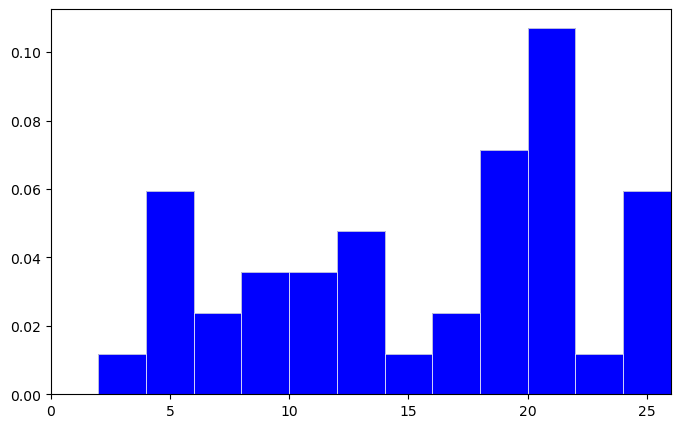

In [24]:
df_4 = (df.loc[df['company_location'] != 'US']).copy()

df_4.loc[:, 'salary_in_10kusd'] = df_4['salary_in_usd'] / 1000

rang = np.arange(0, 27, 2)

plt.figure(figsize=(8, 5))

histogram = plt.hist(df_4['salary_in_10kusd'], bins=rang, density=True, linewidth=0.5, edgecolor='black')

print(histogram[0][3])

plt.hist(df_4['salary_in_10kusd'], bins=rang, density=True, linewidth=0.5, edgecolor='white', color='blue')
plt.xlim(0, 26)
plt.show()

[Voltar ao Índice](#indice)

<div id="p5"></div>

## PERGUNTA 6:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

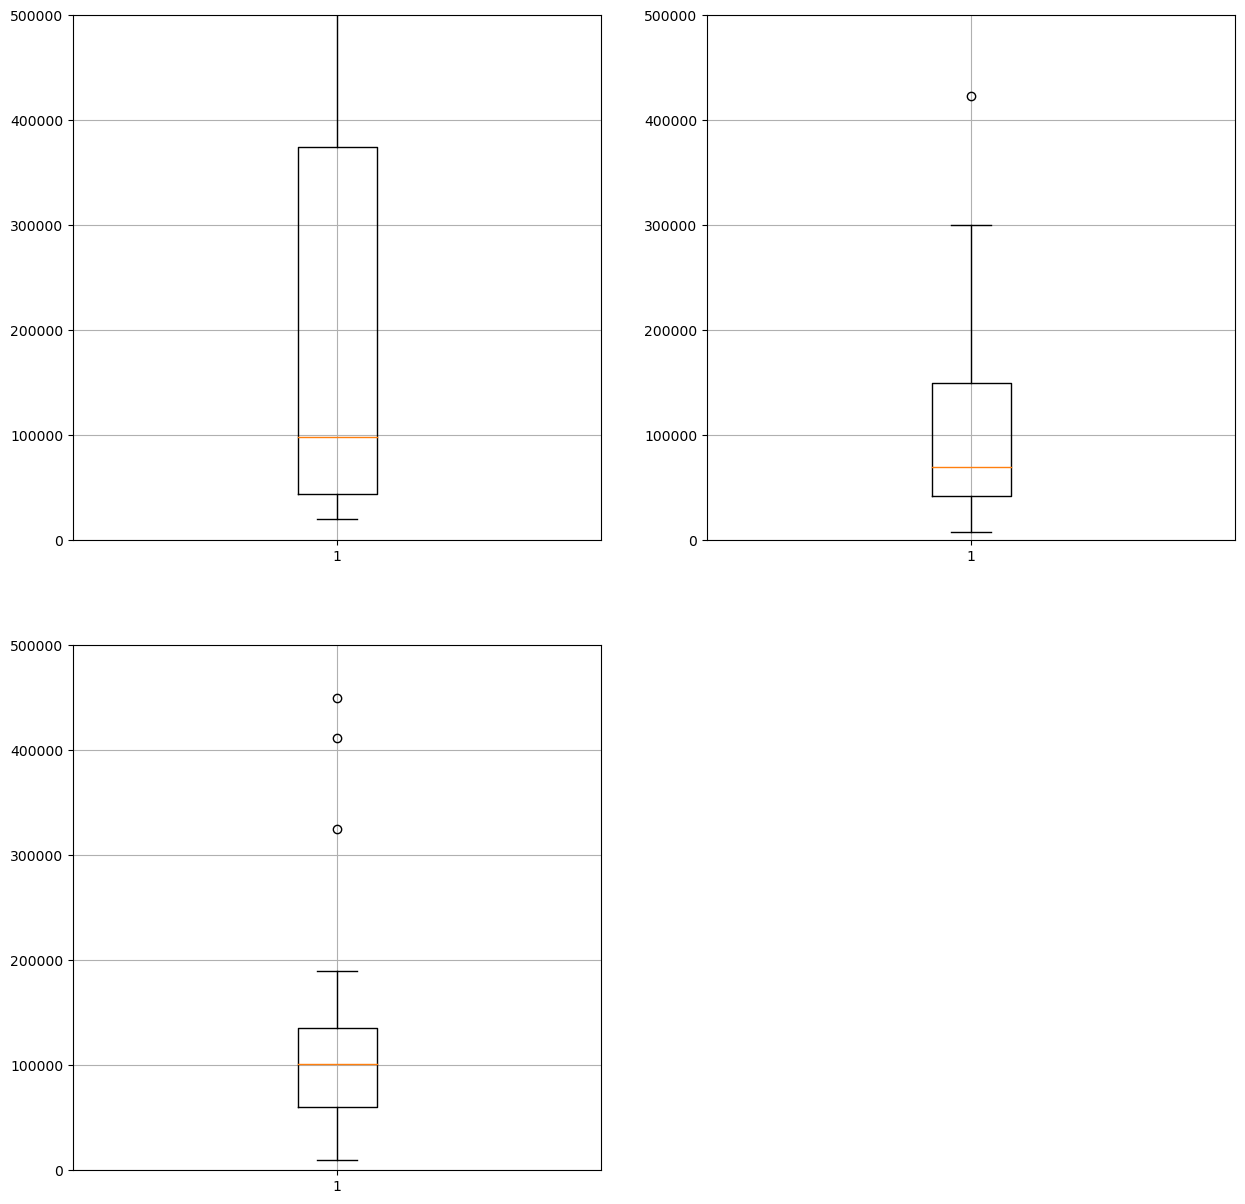

In [86]:
df6 = df.loc[df['work_year'] == 2020]

df_rr_0 = df6.loc[df6['remote_ratio'] == 0]
df_rr_50 = df6.loc[df6['remote_ratio'] == 50]
df_rr_100 = df6.loc[df6['remote_ratio'] == 100]

plt.figure(figsize=(15, 15))

plt.subplot(221)
plt.boxplot(df_rr_0['salary'])
plt.grid()

plt.ylim(0, 0.5e6)

plt.subplot(222)
plt.boxplot(df_rr_50['salary'])
plt.grid()

plt.ylim(0, 0.5e6)

plt.subplot(223)
plt.boxplot(df_rr_100['salary'])
plt.grid()

plt.ylim(0, 0.5e6)

plt.show()

In [87]:
df_rr_50['salary'].max()

11000000

[Voltar ao Índice](#indice)